# Explore here

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

import warnings

In [35]:
warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv(r'C:\Users\samue\OneDrive\Escritorio\4GeeksAcademy\26a clase-Time-series\Time-series-1\data\raw\data')
df = pd.DataFrame(data)

In [37]:
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [38]:
df['date'] = pd.to_datetime(df['date']).dt.strftime('%d-%m-%Y')
df.head()

,date,sales
0,03-09-2022,55.292157
1,04-09-2022,53.803211
2,05-09-2022,58.141693
3,06-09-2022,64.530899
4,07-09-2022,66.013633


In [39]:
df.columns = df.columns.str.strip()

In [42]:
df = df.set_index('date')

# Seleccionar la columna que deseas utilizar como serie temporal
ts = df['sales']

In [43]:
ts.head()

date
03-09-2022    55.292157
04-09-2022    53.803211
05-09-2022    58.141693
06-09-2022    64.530899
07-09-2022    66.013633
Name: sales, dtype: float64

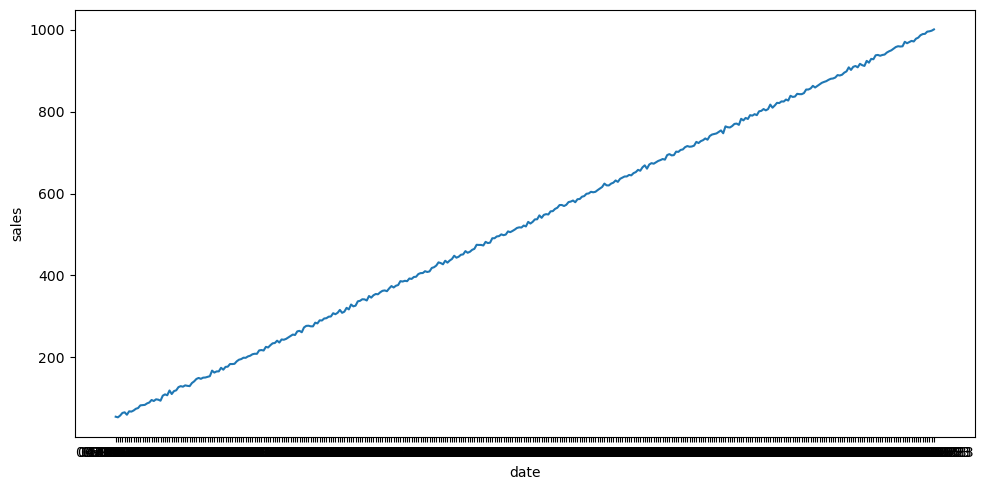

In [44]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

In [53]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

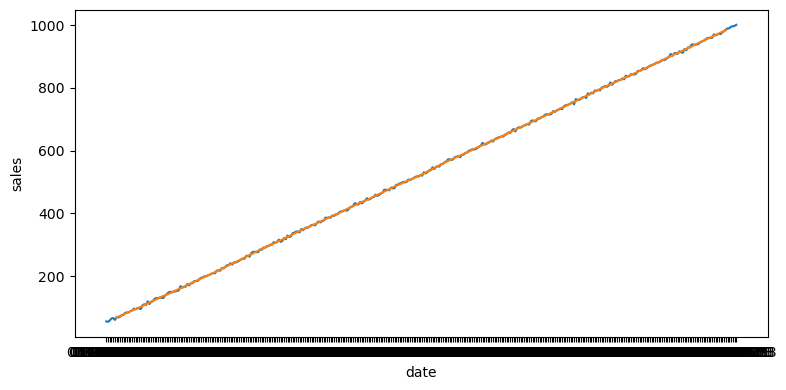

In [54]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (8, 4))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

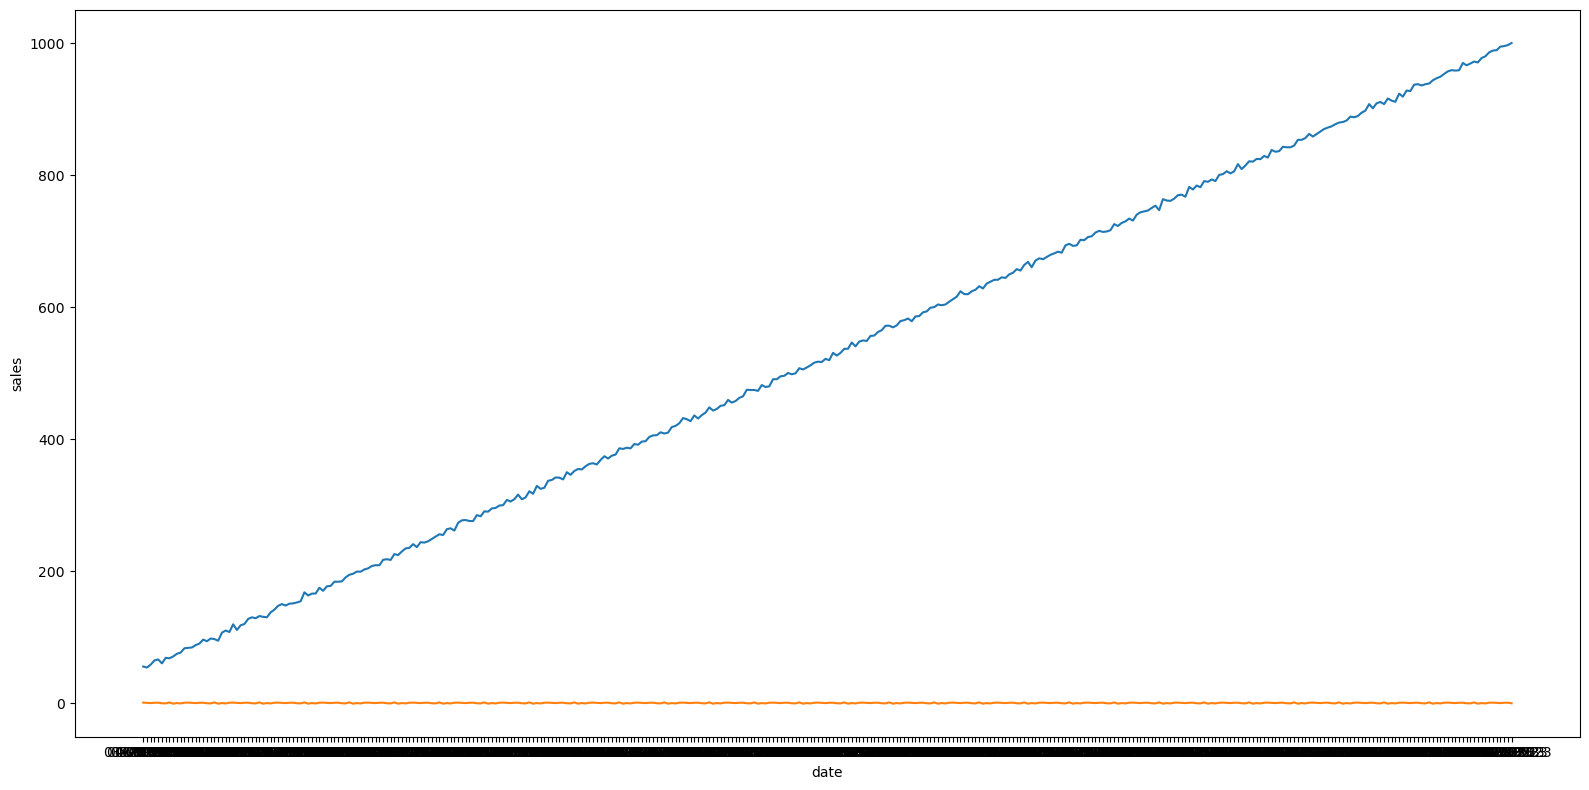

In [58]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (16, 8))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [60]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [61]:
test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

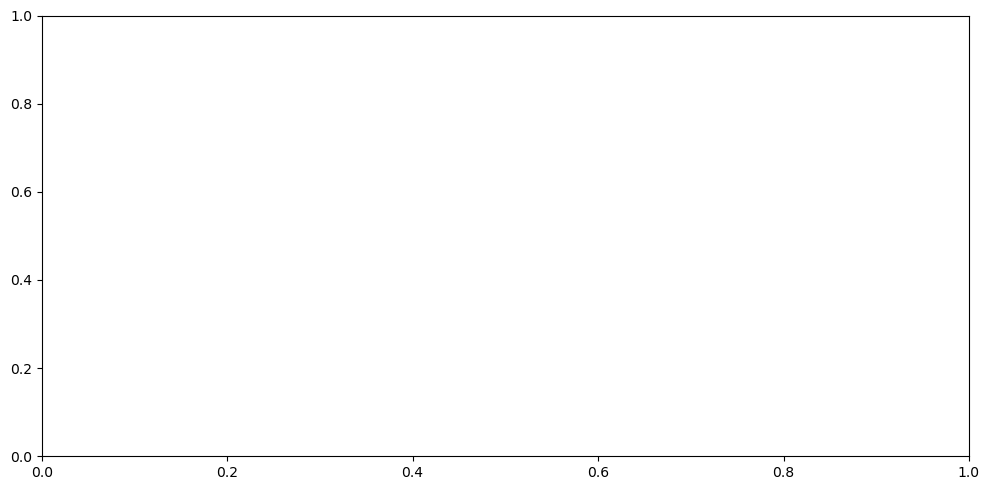

In [52]:
start_date = "2023-01"
end_date = "2023-03"

# selecciono periodo de observación
periodo = (sales.index> start_date) & (sales.index <= end_date)

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = sales.loc[periodo])

plt.tight_layout()
